[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/co-corporeality/tutorial-notebooks/blob/master/Architecture%20Classification.ipynb)

# Image Classification Quickstart

*adaptation of a [fast.ai course notebook](https://github.com/fastai/course-v3) by Francisco Ingham and Jeremy Howard, which was in turn inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

This tutorial shows how to create an image dataset with Google Images, and train and test a neural network on it. We'll first import some tools from the fast.ai library. (`import *` is not recommended for production code, since it makes it hard to understand where functions are defined, but it saves some typing when experimenting interactively in a notebook.)

In [0]:
from fastai.vision import *
from pathlib import Path
import numpy as np

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results (although you can also manually prune images later).

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some JavaScript code in your browser which will save the URLs of all the images you want for you dataset.

In Firefox, press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>K</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>K</kbd> in Mac. In Google Chrome, use <kbd>J</kbd> instead of <kbd>K</kbd>. In either case, a small window, the JavaScript 'Console', will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

(Firefox prevents pasting commands from the clipboard by default. To enable it, type "allow pasting" in the console and delete it again.)

The browser will ask you where to save the file. Save it somewhere you can find it again, and name it after the class. If you do not see a download dialog, check if there is a note on top of the screen telling that a popup has been blocked, and unblock it.

When the file has been saved, go back to the previous step and repeat with another search term for another target class.

### Upload urls file into your server

If you are not running this notebook locally on your own computer, you will need to transfer the URL files to the notebook server. In Jupyter Lab, click the "New Folder" button in the file overview on the left, call it "dataset". Open the directory and click the "Upload Files" button. Upload all ".csv" files you created before.

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

We will run this for all the ".csv" files in a loop.

Define the directory where you put all the ".csv" files. If you uploaded the files to the server, it will be "dataset". Otherwise it may be a directory somewhere on your disk.

In [0]:
path = Path('/content/architecture')

Let's verify that the ".csv" files are there.

In [0]:
list(path.glob('*.csv'))

[PosixPath('/content/architecture/hadid.csv')]

We will now iterate over the CSV files and download the images to separate subdirectories.

In [0]:
for csv in path.glob('*.csv'):
    classname = csv.stem
    print(classname)
    dest = path/classname
    dest.mkdir(parents=True, exist_ok=True)
    download_images(csv, dest, max_pics=200, max_workers=1)

Then we can remove any images that can't be opened:

In [0]:
for csv in path.glob('*.csv'):
    classname = csv.stem
    print(classname)
    verify_images(path/classname, delete=True, max_size=500)

## View data

We create a fast.ai `ImageDataBunch` from the directory of images we just downloaded:

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train="train", valid="val",
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [0]:
data.classes

['coophimmelblau', 'hadid']

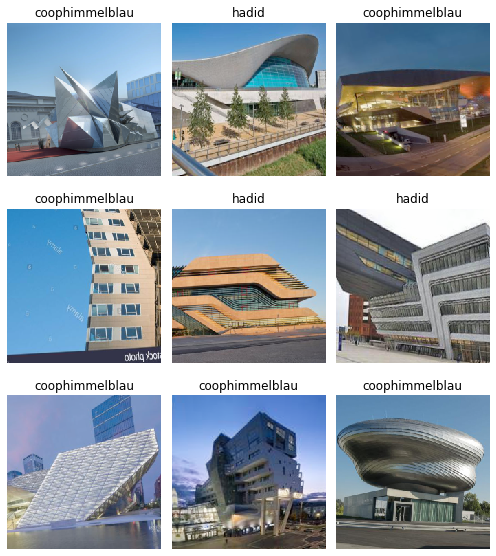

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['coophimmelblau', 'hadid'], 2, 386, 377)

## Train a neural network

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 23.3MB/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.203759,1.285357,0.408488,00:08
1,0.897911,1.051102,0.286472,00:07
2,0.730527,0.967795,0.286472,00:07
3,0.664605,0.975876,0.294430,00:07


In [0]:
learn.save('models/stage-1')

## Checking results

Fast.ai also provides tools to quickly check if and what the model has learned, encapsulated in a `ClassificationInterpretation` class.

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

### Confusion matrix

This shows which classes were predicted how often, separated by ground truth class.

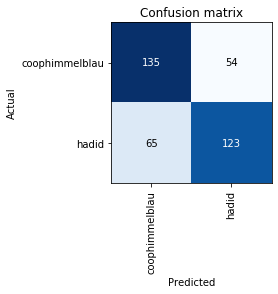

In [0]:
interp.plot_confusion_matrix()

### Wrongly classified examples

It can be helpful to look at the examples that were predicted wrongly.

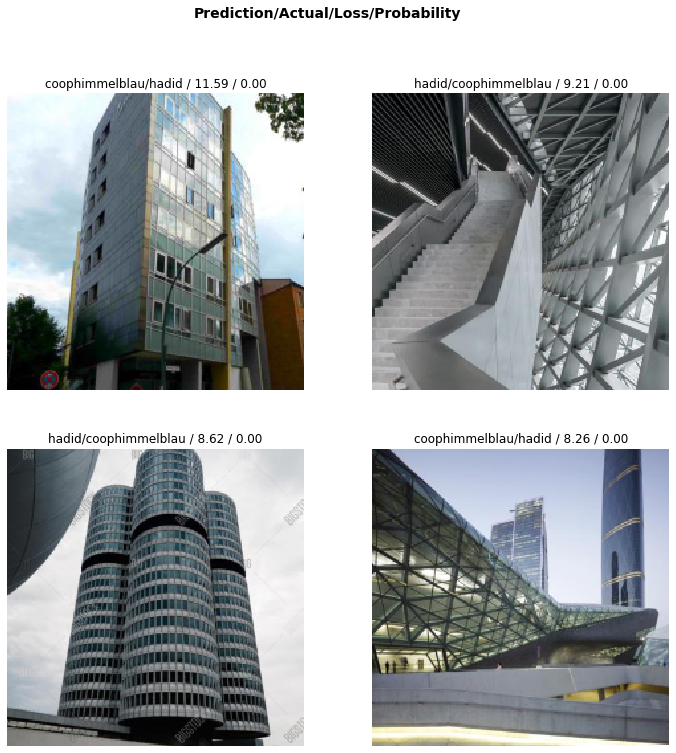

In [0]:
interp.plot_top_losses(4, heatmap=False)

## More

Check the original fast.ai course (lesson 2, [code](https://github.com/fastai/course-v3), [video](https://course.fast.ai/videos/?lesson=2)) for an interactive tool to remove wrongly annotated images from the dataset, and for further fine-tuning of the network.

In [0]:
! cd /content/

In [0]:
! rm -rf __MACOSX